In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##  Load the Dataset

In [2]:
bank_df=pd.read_csv(r'c:\Datasets\credit_risk_dataset.csv')

In [3]:
bank_df.shape

(32581, 12)

In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
bank_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


## Data Cleaning 

In [6]:
bank_df.duplicated().sum()

165

In [7]:
bank_df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [8]:
bank_df.drop_duplicates(keep='first',inplace=True)

In [9]:
bank_df.duplicated().sum()

0

In [10]:
bank_df.dropna(inplace=True)

In [11]:
bank_df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [12]:
bank_df.reset_index(inplace=True)

In [13]:
bank_df.drop('index',axis=1,inplace=True)

In [14]:
bank_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Machine Learning 

### Data Preparation
* Train Test Split
* Encoding for Categorical Columns
    * Ordinal : LabelEncoding or OrdinalEncoding
    * Nominal : OneHotEncoding or get_dummies
* Encoding for Numerical Columns
* Standardization (z-transformation)

In [15]:
bank_df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [16]:
Bank_df=bank_df[['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length','loan_status']]

In [17]:
Bank_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1


## Identify the Target Variable and Splitting the Data into train and test

In [18]:
y=bank_df['loan_status']
X=bank_df.drop('loan_status',axis=1)
# X=bank_df[['person_age', 'person_income', 'person_home_ownership',
#        'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
#        'loan_int_rate', 'loan_percent_income',
#        'cb_person_default_on_file', 'cb_person_cred_hist_length']]

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=100)

In [20]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(21375, 11) (21375,)
(7126, 11) (7126,)


## Separating Categorical and Numerical Columns

In [21]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
5480,26,33600,RENT,4.0,DEBTCONSOLIDATION,B,6000,10.71,0.18,N,3
28397,53,43200,RENT,0.0,VENTURE,B,10000,9.88,0.23,N,30
27882,44,175000,MORTGAGE,9.0,HOMEIMPROVEMENT,A,15000,7.66,0.09,N,17
9674,25,63000,RENT,6.0,VENTURE,C,4200,14.22,0.07,N,4
13688,25,133000,MORTGAGE,8.0,DEBTCONSOLIDATION,F,3000,17.90,0.02,Y,2


In [22]:
X_train_cat = X_train.select_dtypes(include=['object'])

In [23]:
X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
5480,RENT,DEBTCONSOLIDATION,B,N
28397,RENT,VENTURE,B,N
27882,MORTGAGE,HOMEIMPROVEMENT,A,N
9674,RENT,VENTURE,C,N
13688,MORTGAGE,DEBTCONSOLIDATION,F,Y


In [24]:
X_train_num = X_train.select_dtypes(include=['number'])

In [25]:
X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
5480,26,33600,4.0,6000,10.71,0.18,3
28397,53,43200,0.0,10000,9.88,0.23,30
27882,44,175000,9.0,15000,7.66,0.09,17
9674,25,63000,6.0,4200,14.22,0.07,4
13688,25,133000,8.0,3000,17.90,0.02,2


## Scaling the Numerical Features(Standardization)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),
                                   columns = X_train_num.columns,
                                   index = X_train_num.index)

X_train_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
5480,-0.278382,-0.499954,-0.188847,-0.576751,-0.107178,0.095536,-0.694560
28397,4.027395,-0.355098,-1.163696,0.052923,-0.363239,0.563539,5.974683
27882,2.592136,1.633656,1.029714,0.840016,-1.048124,-0.746869,2.763566
9674,-0.437856,-0.056332,0.298577,-0.860104,0.975682,-0.934071,-0.447551
13688,-0.437856,0.999910,0.786002,-1.049007,2.110988,-1.402074,-0.941569


In [27]:
X_train_num_rescaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21375 entries, 5480 to 5640
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  21375 non-null  float64
 1   person_income               21375 non-null  float64
 2   person_emp_length           21375 non-null  float64
 3   loan_amnt                   21375 non-null  float64
 4   loan_int_rate               21375 non-null  float64
 5   loan_percent_income         21375 non-null  float64
 6   cb_person_cred_hist_length  21375 non-null  float64
dtypes: float64(7)
memory usage: 1.3 MB


## Applying OneHotEncoding on Categorical Columns

In [28]:
X_train_cat.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [29]:
X_train_cat_OHE =X_train_cat[['person_home_ownership', 'loan_intent',
       'cb_person_default_on_file']]

In [30]:
X_train_cat_OHE.head()

,person_home_ownership,loan_intent,cb_person_default_on_file
5480,RENT,DEBTCONSOLIDATION,N
28397,RENT,VENTURE,N
27882,MORTGAGE,HOMEIMPROVEMENT,N
9674,RENT,VENTURE,N
13688,MORTGAGE,DEBTCONSOLIDATION,Y


In [31]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first',sparse=False)


X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat_OHE),
                              columns=encoder.get_feature_names_out(X_train_cat_OHE.columns),
                              index=X_train_cat_OHE.index)

X_train_cat_ohe.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
5480,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28397,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
27882,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9674,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
13688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Applying Label Encoding on Categorical Columns

In [32]:
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)
X_train_cat_le.head()

""
5480
28397
27882
9674
13688


In [33]:
X_train_cat['loan_grade'].unique()

array(['B', 'A', 'C', 'F', 'D', 'E', 'G'], dtype=object)

In [34]:
X_train_cat['loan_grade'].value_counts()

A    7043
B    6748
C    4246
D    2458
E     673
F     162
G      45
Name: loan_grade, dtype: int64

In [35]:
grade_encoder = {'G':7,'F':6,'E':5,'D':4,'C':3,'B':2,'A':1}
X_train_cat_le['loan_grade'] = X_train_cat['loan_grade'].apply(lambda x:grade_encoder[x])
X_train_cat_le.head()

,loan_grade
5480,2
28397,2
27882,1
9674,3
13688,6


## Concatinating the Encoded Categorical Features and Rescaled Numerical Features

In [36]:
X_train_transformed = pd.concat([X_train_num_rescaled , X_train_cat_ohe, X_train_cat_le],axis=1)
X_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
5480,-0.278382,-0.499954,-0.188847,-0.576751,-0.107178,0.095536,-0.694560,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
28397,4.027395,-0.355098,-1.163696,0.052923,-0.363239,0.563539,5.974683,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2
27882,2.592136,1.633656,1.029714,0.840016,-1.048124,-0.746869,2.763566,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
9674,-0.437856,-0.056332,0.298577,-0.860104,0.975682,-0.934071,-0.447551,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3
13688,-0.437856,0.999910,0.786002,-1.049007,2.110988,-1.402074,-0.941569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6


In [37]:
X_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21375 entries, 5480 to 5640
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   21375 non-null  float64
 1   person_income                21375 non-null  float64
 2   person_emp_length            21375 non-null  float64
 3   loan_amnt                    21375 non-null  float64
 4   loan_int_rate                21375 non-null  float64
 5   loan_percent_income          21375 non-null  float64
 6   cb_person_cred_hist_length   21375 non-null  float64
 7   person_home_ownership_OTHER  21375 non-null  float64
 8   person_home_ownership_OWN    21375 non-null  float64
 9   person_home_ownership_RENT   21375 non-null  float64
 10  loan_intent_EDUCATION        21375 non-null  float64
 11  loan_intent_HOMEIMPROVEMENT  21375 non-null  float64
 12  loan_intent_MEDICAL          21375 non-null  float64
 13  loan_intent_PE

# Preparing Test Data

## Separating Categorical and Numerical Columns

In [38]:
X_test_num = X_test.select_dtypes(include=['number'])

In [39]:
X_test_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
26154,37,40800,0.0,4000,13.49,0.10,14
14216,24,72000,5.0,8000,10.00,0.11,2
7066,24,55000,4.0,1600,13.79,0.03,2
21607,30,66000,5.0,10000,14.83,0.15,9
25668,41,75000,1.0,20000,11.14,0.27,11


In [40]:
X_test_cat = X_test.select_dtypes(include=['object'])

In [41]:
X_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
26154,OWN,VENTURE,C,Y
14216,RENT,HOMEIMPROVEMENT,B,N
7066,MORTGAGE,DEBTCONSOLIDATION,C,N
21607,RENT,EDUCATION,D,Y
25668,RENT,PERSONAL,B,N


## Scaling the Numerical Features(Standardization)

In [43]:
X_test_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7126 entries, 26154 to 10638
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  7126 non-null   int64  
 1   person_income               7126 non-null   int64  
 2   person_emp_length           7126 non-null   float64
 3   loan_amnt                   7126 non-null   int64  
 4   loan_int_rate               7126 non-null   float64
 5   loan_percent_income         7126 non-null   float64
 6   cb_person_cred_hist_length  7126 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 445.4 KB


In [44]:
X_test_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
26154,37,40800,0.0,4000,13.49,0.10,14
14216,24,72000,5.0,8000,10.00,0.11,2
7066,24,55000,4.0,1600,13.79,0.03,2
21607,30,66000,5.0,10000,14.83,0.15,9
25668,41,75000,1.0,20000,11.14,0.27,11


In [42]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num),
                                   columns = X_test_num.columns,
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
26154,1.475823,-0.391312,-1.163696,-0.891588,0.750472,-0.653269,2.022539
14216,-0.597329,0.079471,0.054865,-0.261914,-0.326218,-0.559668,-0.941569
7066,-0.597329,-0.177045,-0.188847,-1.269392,0.843024,-1.308473,-0.941569
21607,0.359510,-0.011064,0.054865,0.052923,1.163871,-0.185266,0.787494
25668,2.113716,0.124738,-0.919984,1.627109,0.025480,0.937942,1.281512


## Applying OneHotEncoding on Categorical Columns

In [188]:
X_test_cat_OHE = X_test_cat[['person_home_ownership', 'loan_intent',
                               'cb_person_default_on_file']]

In [189]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat_OHE),
                              columns=encoder.get_feature_names_out(X_test_cat_OHE.columns),
                              index=X_test_cat_OHE.index)

X_test_cat_ohe.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
26154,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14216,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
7066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21607,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
25668,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Applying Label Encoding on Categorical Columns

In [190]:
X_test_cat_le = X_test_cat['loan_grade']

In [191]:
X_test_cat_le = pd.DataFrame(index=X_test_cat.index)
X_test_cat_le.head()

""
26154
14216
7066
21607
25668


In [192]:
grade_encoder = {'G':7,'F':6,'E':5,'D':4,'C':3,'B':2,'A':1}
X_test_cat_le['loan_grade'] = X_test_cat['loan_grade'].apply(lambda x:grade_encoder[x])
X_test_cat_le.head()

,loan_grade
26154,3
14216,2
7066,3
21607,4
25668,2


## Concatinating the Encoded Categorical Features and Rescaled Numerical Features

In [193]:
X_test_transformed = pd.concat([X_test_num_rescaled , X_test_cat_ohe, X_test_cat_le],axis=1)
X_test_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
26154,1.475823,-0.391312,-1.163696,-0.891588,0.750472,-0.653269,2.022539,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3
14216,-0.597329,0.079471,0.054865,-0.261914,-0.326218,-0.559668,-0.941569,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2
7066,-0.597329,-0.177045,-0.188847,-1.269392,0.843024,-1.308473,-0.941569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
21607,0.359510,-0.011064,0.054865,0.052923,1.163871,-0.185266,0.787494,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4
25668,2.113716,0.124738,-0.919984,1.627109,0.025480,0.937942,1.281512,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2


# Model Training Phase

## KNN Classifier

In [194]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed,y_train)

KNeighborsClassifier()

In [195]:
y_test_pred = classifier.predict(X_test_transformed)

In [196]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
26154,0,0
14216,0,0
7066,0,0
21607,1,0
25668,0,0


In [197]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_test_pred).round(2)

0.9

## Logistic Regression

In [198]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_transformed,y_train)

LogisticRegression()

In [199]:
y_test_pred = classifier.predict(X_test_transformed)

In [200]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
26154,0,0
14216,0,0
7066,0,0
21607,1,0
25668,0,0


In [201]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_test_pred).round(2)

0.86

## Support vector Machines

In [202]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_transformed,y_train)

SVC()

In [203]:
y_test_pred = classifier.predict(X_test_transformed)

In [204]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
26154,0,0
14216,0,0
7066,0,0
21607,1,0
25668,0,0


In [205]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_test_pred).round(2)

0.92

## Decision Tree 

In [206]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [207]:
y_test_pred = classifier.predict(X_test_transformed)

In [208]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
26154,0,0
14216,0,0
7066,0,0
21607,1,0
25668,0,0


In [209]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_test_pred).round(2)

0.89

## Random Forest Classifier

In [210]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed,y_train)

RandomForestClassifier()

In [211]:
y_test_pred = classifier.predict(X_test_transformed)

In [212]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
26154,0,0
14216,0,0
7066,0,0
21607,1,0
25668,0,0


In [213]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_test_pred).round(2)

0.94

## Display a plot which shows all the algorithms applied along with the accuracies achieved.

In [214]:
algorithms = ['KNN','Logistic Regression','Support Vecto Machine','Decision Tree','Random Forest']
accuracy = [0.89,0.86,0.91,0.88,0.94]

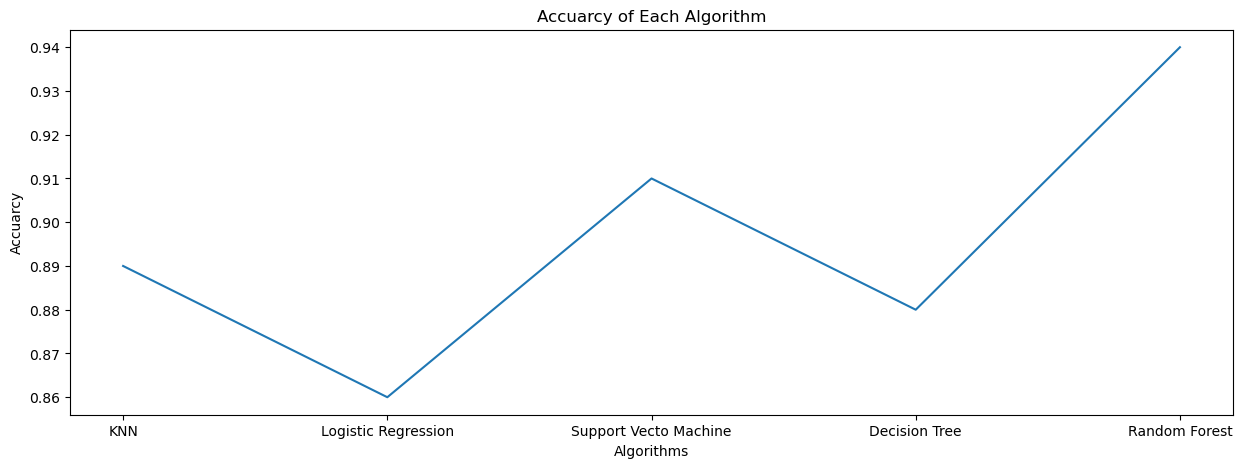

In [215]:
plt.figure(figsize=(15,5))
sns.lineplot(algorithms,accuracy)
plt.xlabel('Algorithms')
plt.ylabel('Accuarcy')
plt.title('Accuarcy of Each Algorithm');

####  From above lineplot,I observed that Random forest accuracy is more(0.94) as compared to other algorithms.